In [ ]:
!pip install azure-storage-queue==2.1.0 # 특정버전을 설치하고 싶을 때 버전명을 설정해준다.

In [17]:
from azure.storage.queue import QueueService, QueueMessageFormat

In [18]:
import os, uuid # uuid는 난수를 만들어 준다.

In [ ]:
connect_str = ''
# 아래 보이는 사진처럼 가지고 온다.
queue_name = 'queue-' + str(uuid.uuid4()) # 난수를 가지고 온다.

print('Creaging queue:' + queue_name) # 아직까지 이름만 가지고 온 형태이다.
queue_service = QueueService(connection_string = connect_str)

queue_service.create_queue(queue_name) # 자동으로 큐를 생성하는 코드를 만들었다.

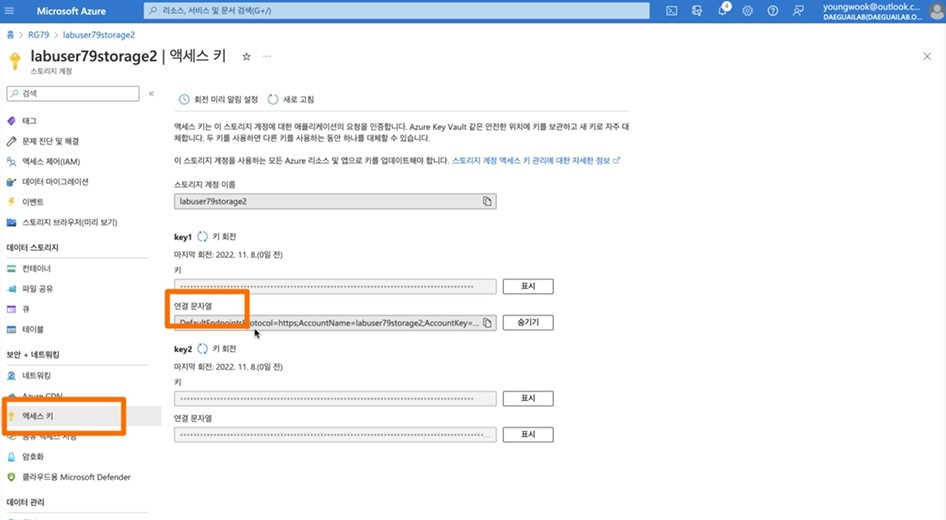

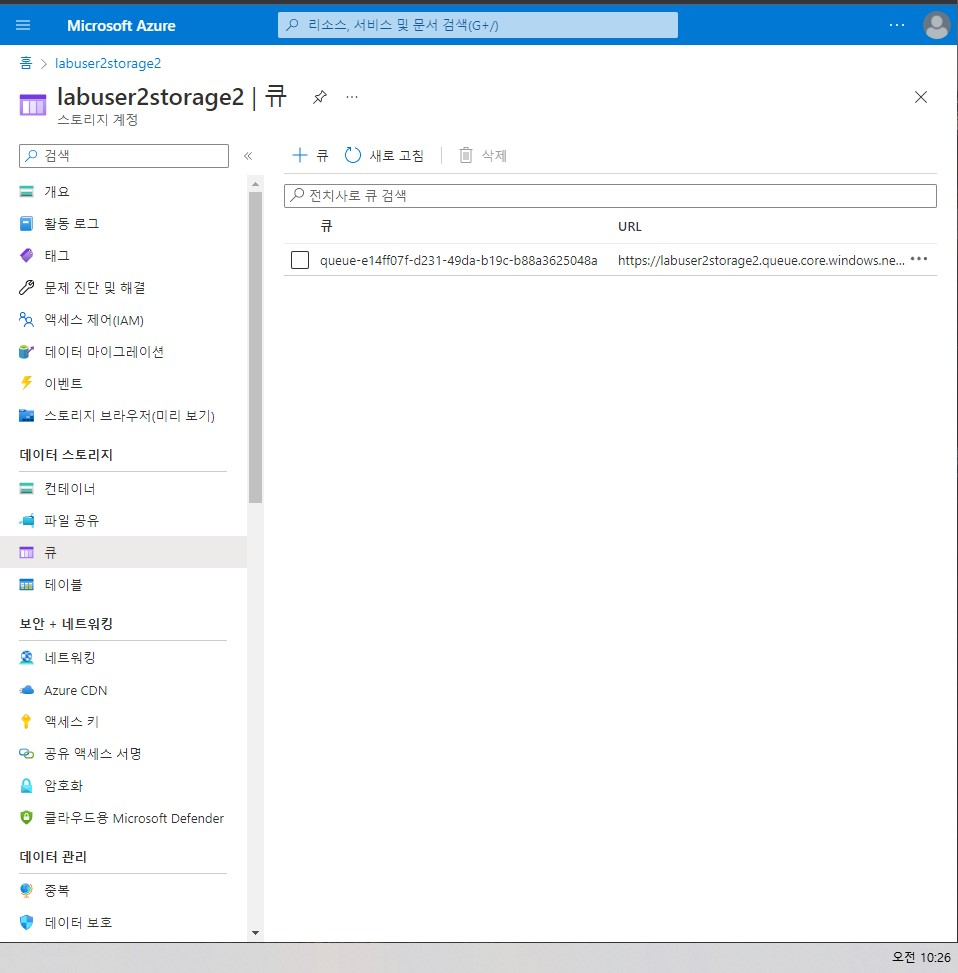

In [ ]:
# Setup Base64 encoding and decoding functions
queue_service.encode_function = QueueMessageFormat.binary_base64encode
queue_service.decode_function = QueueMessageFormat.binary_base64decode

import base64
message = 'Hello Queue' # 보낼 메세지

print('Adding message: ' + message)
message = base64.b64encode(message.encode('utf-8')) # 표준 방식으로 변환해준다.
message
queue_service.put_message(queue_name, message) # 큐안에 메세지를 넣는다.

* 유니코드를 바꾸는 이유는 결과를 봐주기 위해서 이다.
* 인코딩 된거는 바이너리라서 앞에 b가 붙어있다.

In [21]:
messages = queue_service.peek_messages(queue_name) # messages로 가지고 온다.

for peeked_massage in messages: # 순차적으로 가지고 온다.
  message = base64.b64decode(peeked_massage.content) # 디코딩하는 것을 집어 넣어준다.
  print('Peeked message: ' + message.decode('utf-8'))

1
Peeked message: Hello Queue


* peek한 것은 아직도 값이 남아있다는 것이다.

In [22]:
# 큐에서 가지고 오는 것을 해본다 get을 사용해서
messages = queue_service.get_messages(queue_name) # 큐의 이름을 가지고 온다.

for msg in messages:
  message = base64.b64decode(msg.content)
  print('Message: ' + message.decode('utf-8')) # 디코드는 utf-8로 해준다.

Message: Hello Queue


In [ ]:
print('Deleting queue: ' + queue_name)
queue_service.delete_queue(queue_name) # dekete를 사용해서 삭제를 해준다.

* 큐가 삭제가 되는 것을 볼 수 있다.
* 큐는 메세지를 받고 전송하는 역할을 한다.